In [7]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv

load_dotenv()

True

In [8]:
model = ChatGoogleGenerativeAI(model='gemini-2.0-flash')

In [9]:
# create a State
class LLMState(TypedDict): # acts as memory for the agent

    question: str
    answer:str

In [10]:
def llm_qa(state: LLMState) -> LLMState: # return LLMState object

    # extract question from state
    question = state['question']

    # form a prompt
    prompt = f'Answer the following question {question}'

    # ask that question to the LLM
    answer = model.invoke(prompt).content
    # update the answer in the state
    state['answer'] = answer

    return state

In [11]:
# Create a graph

graph = StateGraph(LLMState)

# add nodes
graph.add_node("llm_qa", llm_qa)

# add edges
graph.add_edge(START,'llm_qa')
graph.add_edge('llm_qa', END)

# compile
workflow = graph.compile()


In [12]:
# execute 

initial_state = {'question': 'How far is moon from the earth'}
final_state = workflow.invoke(initial_state)

print(final_state)

{'question': 'How far is moon from the earth', 'answer': "The distance between the Earth and the Moon isn't constant, as the Moon's orbit is an ellipse.\n\n*   **Average distance:** 384,400 kilometers (238,900 miles)\n\n*   **Perigee (closest point):** Around 363,104 kilometers (225,623 miles)\n\n*   **Apogee (farthest point):** Around 405,696 kilometers (252,088 miles)"}


In [13]:
print(final_state['answer'])

The distance between the Earth and the Moon isn't constant, as the Moon's orbit is an ellipse.

*   **Average distance:** 384,400 kilometers (238,900 miles)

*   **Perigee (closest point):** Around 363,104 kilometers (225,623 miles)

*   **Apogee (farthest point):** Around 405,696 kilometers (252,088 miles)


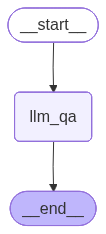

In [6]:
workflow